In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
ticker = yf.Ticker('X')
ticker.quarterly_income_stmt

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Tax Effect Of Unusual Items,252100.840336,840000.0,-1171548.117155,-1818181.818182,-26880000.0,NaN,NaN
Tax Rate For Calcs,0.252101,0.21,0.23431,0.181818,0.21,NaN,NaN
Normalized EBITDA,146000000.0,345000000.0,463000000.0,431000000.0,213000000.0,NaN,NaN
Total Unusual Items,1000000.0,4000000.0,-5000000.0,-10000000.0,-128000000.0,NaN,NaN
Total Unusual Items Excluding Goodwill,1000000.0,4000000.0,-5000000.0,-10000000.0,-128000000.0,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,-89000000.0,119000000.0,183000000.0,171000000.0,-80000000.0,NaN,NaN
Reconciled Depreciation,251000000.0,235000000.0,217000000.0,210000000.0,241000000.0,NaN,NaN
Reconciled Cost Of Revenue,3318000000.0,3448000000.0,3629000000.0,3665000000.0,3851000000.0,NaN,NaN
EBITDA,147000000.0,349000000.0,458000000.0,421000000.0,85000000.0,NaN,NaN
EBIT,-104000000.0,114000000.0,241000000.0,211000000.0,-156000000.0,NaN,NaN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


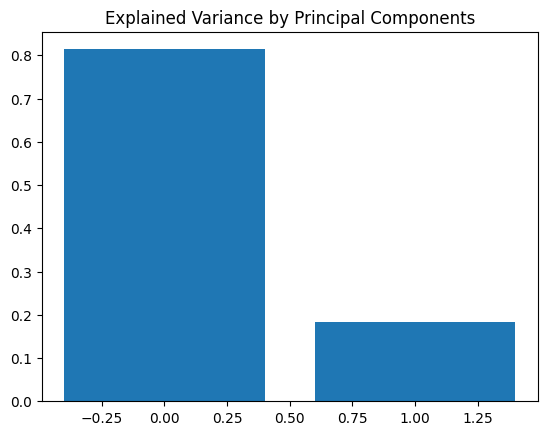

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9976081900553044


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Performance with PCA: 4.599012567442463
Performance without PCA: 4.7655077845483165
Performance with PCA: 7.180983584665728
Performance without PCA: 7.180983584665728
Performance with PCA: 81.2385147579674
Performance without PCA: 81.2385147579674
Performance with PCA: 2.8861296934413936
Performance without PCA: 2.8861296934413936
Performance with PCA: 28.83357923804643
Performance without PCA: 28.83357923804643


In [ ]:
# Step 2: Load the dataset (S&P 500 data)
stock_USS = yf.download('X', start='2020-01-01', end='2025-01-01')
stock_NUCOR = yf.download('NUE', start='2020-01-01', end='2025-01-01')
stock_MITTAL = yf.download('MT', start='2020-01-01', end='2025-01-01')
stock_STEDYN = yf.download('STLD', start='2020-01-01', end='2025-01-01')

# Step 3: Feature Engineering - adding technical indicators
stock_USS['SMA_20'] = stock_USS['Close'].rolling(window=20).mean()
stock_USS['SMA_50'] = stock_USS['Close'].rolling(window=50).mean()
stock_USS['Volatility'] = stock_USS['Close'].rolling(window=20).std()
stock_USS.dropna(inplace=True)

stock_NUCOR['SMA_20'] = stock_NUCOR['Close'].rolling(window=20).mean()
stock_NUCOR['SMA_50'] = stock_NUCOR['Close'].rolling(window=50).mean()
stock_NUCOR['Volatility'] = stock_NUCOR['Close'].rolling(window=20).std()
stock_NUCOR.dropna(inplace=True)

stock_MITTAL['SMA_20'] = stock_MITTAL['Close'].rolling(window=20).mean()
stock_MITTAL['SMA_50'] = stock_MITTAL['Close'].rolling(window=50).mean()
stock_MITTAL['Volatility'] = stock_MITTAL['Close'].rolling(window=20).std()
stock_MITTAL.dropna(inplace=True)

stock_STEDYN['SMA_20'] = stock_STEDYN['Close'].rolling(window=20).mean()
stock_STEDYN['SMA_50'] = stock_STEDYN['Close'].rolling(window=50).mean()
stock_STEDYN['Volatility'] = stock_STEDYN['Close'].rolling(window=20).std()
stock_STEDYN.dropna(inplace=True)

# Step 4: Data Preprocessing - Scaling the data
features1 = stock_USS[['SMA_20', 'SMA_50', 'Volatility']]
features2 = stock_NUCOR[['SMA_20', 'SMA_50', 'Volatility']]
features3 = stock_MITTAL[['SMA_20', 'SMA_50', 'Volatility']]
features4 = stock_STEDYN[['SMA_20', 'SMA_50', 'Volatility']]
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(features1)
scaled_features2 = scaler.fit_transform(features2)
scaled_features3 = scaler.fit_transform(features3)
scaled_features4 = scaler.fit_transform(features4)

# (Optional)
#num_components1 = np.linalg.matrix_rank(np.cov(scaled_features1, rowvar=False))
#print(num_components1)
#pca = PCA().fit(stock_USS)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')

# Step 5: Apply PCA
pca = PCA(n_components=2)  # Retaining 2 components
principal_components1 = pca.fit_transform(scaled_features1)
principal_components2 = pca.fit_transform(scaled_features2)
principal_components3 = pca.fit_transform(scaled_features3)
principal_components4 = pca.fit_transform(scaled_features4)

# Step 6: Visualizing Explained Variance
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.title('Explained Variance by Principal Components')
plt.show()

# Step 7: Building the Predictive Model
X1 = principal_components1
X2 = principal_components2
X3 = principal_components3
X4 = principal_components4
y1 = stock_USS['Close']
y2 = stock_NUCOR['Close']
y3 = stock_MITTAL['Close']
y4 = stock_STEDYN['Close']
# Splitting the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=100)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=100)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=100)
# Using Linear Regression for simplicity
model_pca = RandomForestRegressor()
model_pca.fit(X1_train, y1_train)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
model4 = LinearRegression()
model4.fit(X4_train, y4_train)

# Step 8: Evaluating the Model
y_pred = model_pca.predict(X1_test)
mse = mean_squared_error(y1_test, y_pred)

y1_pred = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
y3_pred = model3.predict(X3_test)
mse3 = mean_squared_error(y3_test, y3_pred)
y4_pred = model4.predict(X4_test)
mse4 = mean_squared_error(y4_test, y4_pred)

print(np.sum(pca.explained_variance_ratio_))

# Step 9: Performance Comparison - Model without PCA
model_no_pca = RandomForestRegressor()
model_no_pca.fit(X1_train, y1_train)
y_pred_no_pca = model_no_pca.predict(X1_test)
mse_no_pca = mean_squared_error(y1_test, y_pred_no_pca)

model1_no_pca = LinearRegression()
model1_no_pca.fit(X1_train, y1_train)
y1_pred_no_pca = model1_no_pca.predict(X1_test)
mse1_no_pca = mean_squared_error(y1_test, y1_pred_no_pca)
model2_no_pca = LinearRegression()
model2_no_pca.fit(X2_train, y2_train)
y2_pred_no_pca = model2_no_pca.predict(X2_test)
mse2_no_pca = mean_squared_error(y2_test, y2_pred_no_pca)
model3_no_pca = LinearRegression()
model3_no_pca.fit(X3_train, y3_train)
y3_pred_no_pca = model3_no_pca.predict(X3_test)
mse3_no_pca = mean_squared_error(y3_test, y3_pred_no_pca)
model4_no_pca = LinearRegression()
model4_no_pca.fit(X4_train, y4_train)
y4_pred_no_pca = model4_no_pca.predict(X4_test)
mse4_no_pca = mean_squared_error(y4_test, y4_pred_no_pca)


# Step 10: Compare the Results
print(f'Performance with PCA: {mse}')
print(f'Performance without PCA: {mse_no_pca}')

print(f'Performance with PCA: {mse1}')
print(f'Performance without PCA: {mse1_no_pca}')
print(f'Performance with PCA: {mse2}')
print(f'Performance without PCA: {mse2_no_pca}')
print(f'Performance with PCA: {mse3}')
print(f'Performance without PCA: {mse3_no_pca}')
print(f'Performance with PCA: {mse4}')
print(f'Performance without PCA: {mse4_no_pca}')

[[0.53267421 0.5354153  0.53248769 0.382159  ]
 [0.21874386 0.21616968 0.22700734 0.92406139]]
Principal Component 1:
  SMA_20: 0.5354
  Close: 0.5327
  SMA_50: 0.5325
  Volatility: 0.3822
Principal Component 2:
  Volatility: 0.9241
  SMA_50: 0.2270
  Close: 0.2187
  SMA_20: 0.2162


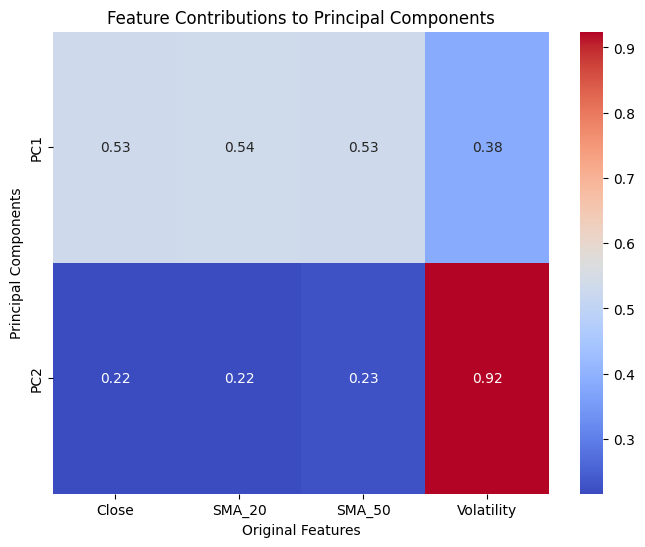

In [ ]:
import seaborn as sns

# Absolute values of PCA components (higher value = more impact)
feature_importance = np.abs(pca.components_)
print(feature_importance)

# Get feature names
feature_names = ['Close', 'SMA_20', 'SMA_50', 'Volatility']  # Adjust based on dataset

# Display importance per component
for i, pc in enumerate(feature_importance):
    sorted_indices = np.argsort(pc)[::-1]  # Sort by importance
    print(f"Principal Component {i+1}:")
    for index in sorted_indices:
        print(f"  {feature_names[index]}: {pc[index]:.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(feature_importance, cmap="coolwarm", annot=True, xticklabels=feature_names, yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.title("Feature Contributions to Principal Components")
plt.show()

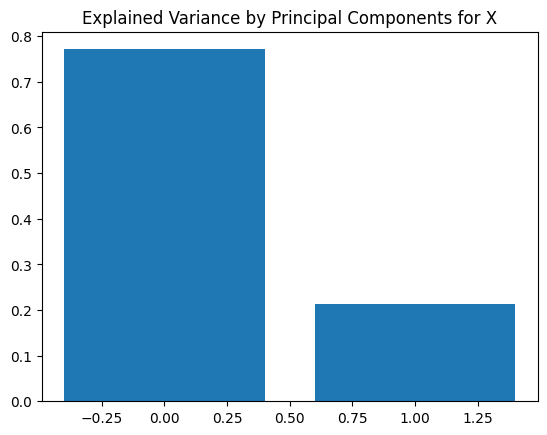

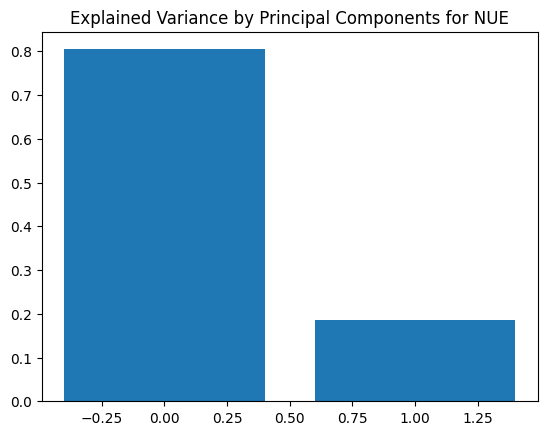

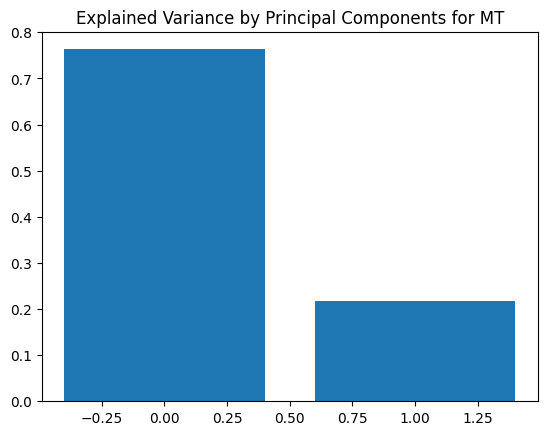

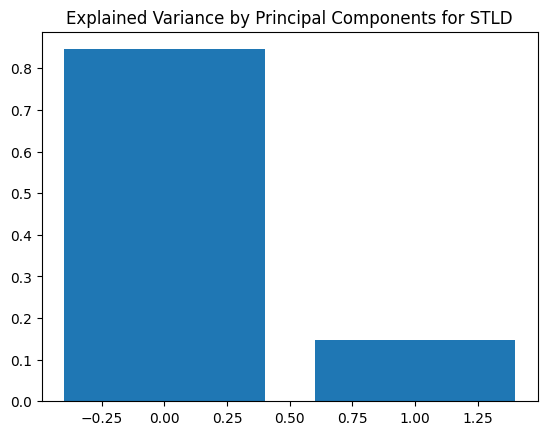

X - Performance with PCA: 3.2573878510972185
X - Performance without PCA: 3.2573878510972185
NUE - Performance with PCA: 35.44497370544923
NUE - Performance without PCA: 35.44497370544923
MT - Performance with PCA: 1.2762939599268648
MT - Performance without PCA: 1.2762939599268648
STLD - Performance with PCA: 12.854015206000714
STLD - Performance without PCA: 12.854015206000714


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
import matplotlib.pyplot as plt

def analyze_stocks(stock_symbols, start_date, end_date):
    stock_data = {}
    features = {}
    scaled_features = {}
    principal_components = {}
    models = {}
    mae_pca = {}
    mae_no_pca = {}

    # Step 2: Load and preprocess the dataset
    for stock in stock_symbols:
        stock_data[stock] = yf.download(stock, start=start_date, end=end_date, progress=False)
        stock_data[stock]['SMA_20'] = stock_data[stock]['Close'].rolling(window=20).mean()
        stock_data[stock]['SMA_50'] = stock_data[stock]['Close'].rolling(window=50).mean()
        stock_data[stock]['Volatility'] = stock_data[stock]['Close'].rolling(window=20).std()
        stock_data[stock].dropna(inplace=True)

    # Step 3: Data Preprocessing
    scaler = StandardScaler()
    pca = PCA(n_components=2)

    for stock in stock_symbols:
        features[stock] = stock_data[stock][['Close', 'SMA_20', 'SMA_50', 'Volatility']]
        scaled_features[stock] = scaler.fit_transform(features[stock])
        principal_components[stock] = pca.fit_transform(scaled_features[stock])
        explained_variance = pca.explained_variance_ratio_

        plt.bar(range(len(explained_variance)), explained_variance)
        plt.title(f'Explained Variance by Principal Components for {stock}')
        plt.show()

        # Step 4: Building the Predictive Model
        X = principal_components[stock]
        y = stock_data[stock]['Close']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae_pca[stock] = mean_squared_error(y_test, y_pred)
        models[stock] = model

        # Step 5: Model without PCA
        model_no_pca = LinearRegression()
        model_no_pca.fit(X_train, y_train)
        y_pred_no_pca = model_no_pca.predict(X_test)
        mae_no_pca[stock] = mean_squared_error(y_test, y_pred_no_pca)

    # Step 6: Compare the Results
    for stock in stock_symbols:
        print(f'{stock} - Performance with PCA: {mae_pca[stock]}')
        print(f'{stock} - Performance without PCA: {mae_no_pca[stock]}')

    return mae_pca, mae_no_pca

# Example Usage:
stocks = ['X', 'NUE', 'MT', 'STLD']
mse_pca_results, mse_no_pca_results = analyze_stocks(stocks, '2020-01-01', '2025-01-01')


In [ ]:
def stock_price_scale(stock_symbols, start_date, end_date):
    results = []

    for stock_symbol in stock_symbols:
        try:
            # Fetch stock data
            stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress = False)

            if stock_data.empty:
                print(f"No data retrieved for {stock_symbol}. Check the symbol or date range.")
                continue

            # Extract closing prices
            close_prices = stock_data['Close']

            # Compute scale metrics
            min_price = close_prices.min().iloc[0] if isinstance(close_prices.min(), pd.Series) else close_prices.min()
            max_price = close_prices.max().iloc[0] if isinstance(close_prices.max(), pd.Series) else close_prices.max()
            mean_price = close_prices.mean().iloc[0] if isinstance(close_prices.mean(), pd.Series) else close_prices.mean()
            median_price = close_prices.median().iloc[0] if isinstance(close_prices.median(), pd.Series) else close_prices.median()
            price_range = (max_price - min_price)
            std_dev = close_prices.std().iloc[0] if isinstance(close_prices.std(), pd.Series) else close_prices.std()

            # Append results to the list
            results.append({
                "Stock": stock_symbol,
                "Min Price": round(min_price,2),
                "Max Price": round(max_price,2),
                "Mean Price": round(mean_price,2),
                "Median Price": round(median_price,2),
                "Price Range": round(price_range,2),
                "Standard Deviation": round(std_dev,2)
            })

        except Exception as e:
            print(f"Error fetching data for {stock_symbol}: {e}")

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    results_df1 = results_df.astype(str)
    print(tabulate(results_df1, headers='keys', tablefmt='fancy_grid'))

    return results_df1

# Example Usage:
stocks = [
    'RIO',  # Rio Tinto Plc
    'VALE',  # Vale Sa
    'NUE',  # Nucor Corp
    'STLD',  # Steel Dynamics Inc
    'X',  # United States Steel Corp
    'RS',  # Reliance Steel & Aluminum Co
    'MT',  # ArcelorMittal Sa
    'CRS',  # Carpenter Technology Corp
    'TS',  # Tenaris Sa
    'PKX',  # Posco Holdings Inc
]
scale_metrics_df = stock_price_scale(stocks, '2020-01-01', '2025-01-01')

╒════╤═════════╤═════════════╤═════════════╤══════════════╤════════════════╤═══════════════╤══════════════════════╕
│    │ Stock   │   Min Price │   Max Price │   Mean Price │   Median Price │   Price Range │   Standard Deviation │
╞════╪═════════╪═════════════╪═════════════╪══════════════╪════════════════╪═══════════════╪══════════════════════╡
│  0 │ RIO     │       25.05 │       71.53 │        55.83 │          58.88 │         46.48 │                10.01 │
├────┼─────────┼─────────────┼─────────────┼──────────────┼────────────────┼───────────────┼──────────────────────┤
│  1 │ VALE    │        4.27 │       16.93 │        11.37 │          11.64 │         12.66 │                 2.65 │
├────┼─────────┼─────────────┼─────────────┼──────────────┼────────────────┼───────────────┼──────────────────────┤
│  2 │ NUE     │       25.7  │      198.6  │       113.72 │         124.43 │        172.9  │                47    │
├────┼─────────┼─────────────┼─────────────┼──────────────┼─────────────